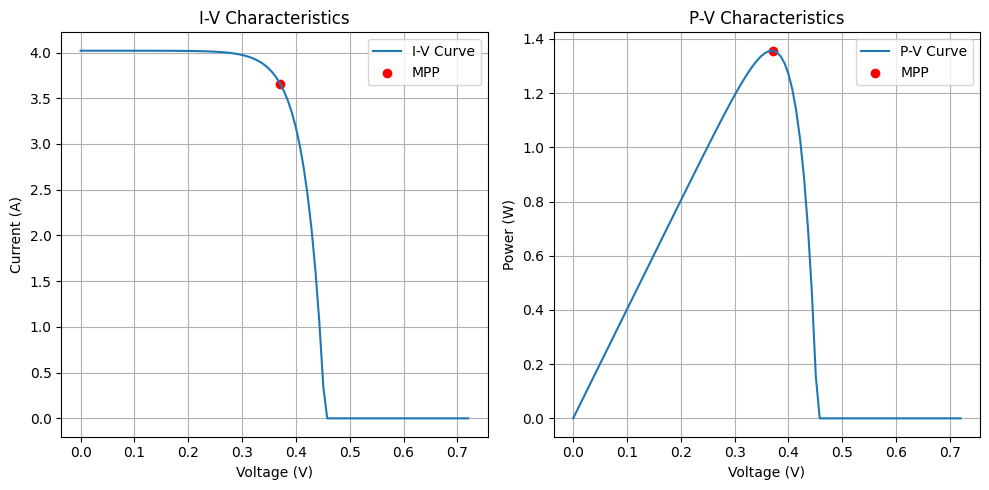

Maximum Power Point:
  Voltage: 0.37 V
  Current: 3.66 A
  Power: 1.36 W


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19       # Electron charge (C)
k = 1.381e-23       # Boltzmann constant (J/K)
T_ref = 298.15      # Reference temperature in K (25°C)
G_ref = 1000        # Reference irradiance in W/m^2

# Solar panel parameters (example for a generic panel)
Voc_ref = 0.6       # Open circuit voltage at STC (V)
Isc_ref = 5.0       # Short circuit current at STC (A)
n = 1.3             # Ideality factor
Ns = 1              # Number of cells in series

def diode_current(V, Iph, T, I0):
    Vt = n * k * T / q
    return Iph - I0 * (np.exp(V / (Ns * Vt)) - 1)

def calculate_IV_curve(G, T_C):
    T = T_C + 273.15
    V = np.linspace(0, Voc_ref * 1.2, 100)

    # Adjust short circuit current with irradiance and temperature
    Iph = Isc_ref * (G / G_ref) * (1 + 0.0005 * (T - T_ref))

    # Estimate reverse saturation current
    Vt = n * k * T / q
    I0 = Isc_ref / (np.exp(Voc_ref / (n * Vt)) - 1)

    I = diode_current(V, Iph, T, I0)
    I[I < 0] = 0  # Limit negative current

    P = V * I
    idx_max = np.argmax(P)

    V_mpp = V[idx_max]
    I_mpp = I[idx_max]
    P_mpp = P[idx_max]

    return V, I, P, V_mpp, I_mpp, P_mpp

# Example input
irradiance = 800   # W/m^2
temperature = 35   # °C

# Run simulation
V, I, P, V_mpp, I_mpp, P_mpp = calculate_IV_curve(irradiance, temperature)

# Plot I-V and P-V curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(V, I, label='I-V Curve')
plt.scatter(V_mpp, I_mpp, color='red', label='MPP')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('I-V Characteristics')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(V, P, label='P-V Curve')
plt.scatter(V_mpp, P_mpp, color='red', label='MPP')
plt.xlabel('Voltage (V)')
plt.ylabel('Power (W)')
plt.title('P-V Characteristics')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print max power point info
print(f"Maximum Power Point:\n  Voltage: {V_mpp:.2f} V\n  Current: {I_mpp:.2f} A\n  Power: {P_mpp:.2f} W")